## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import missingno as msno

In [2]:
data = pd.read_csv('../data/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### Replacing invalid values (0) with NaN

In [6]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Checking number of NaN values

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

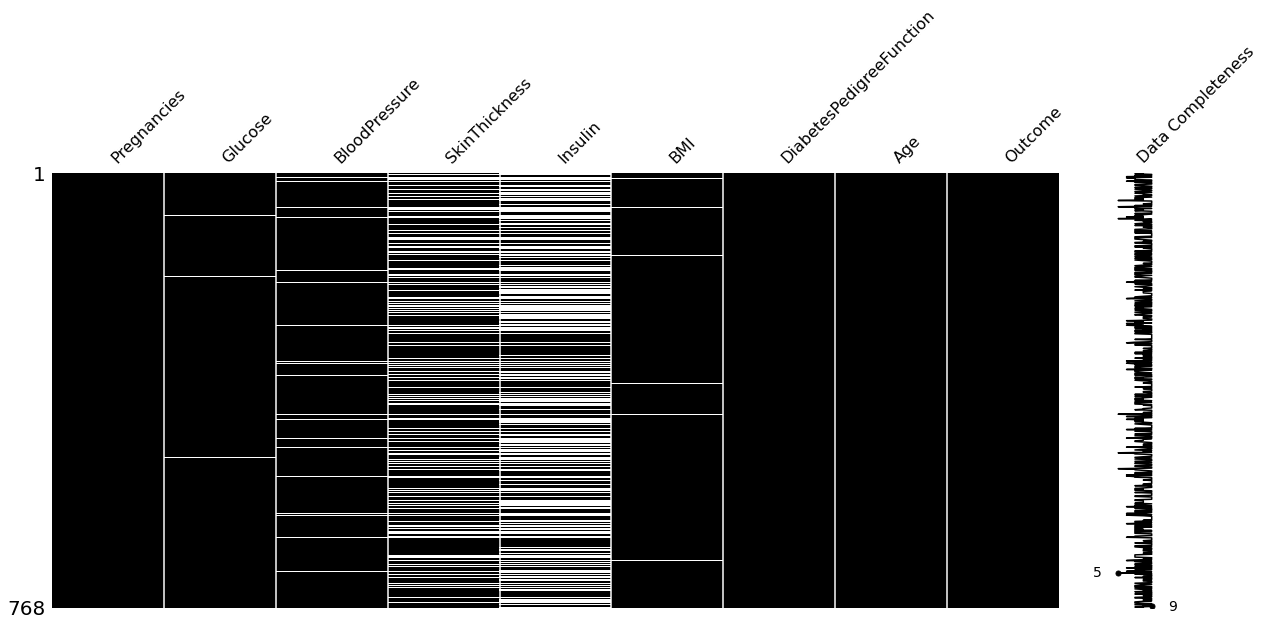

In [8]:
msno.matrix(data, figsize = (20, 8), labels = True, color = (0.0, 0.0, 0.0)) 
plt.show()

### Initial Correlation Map

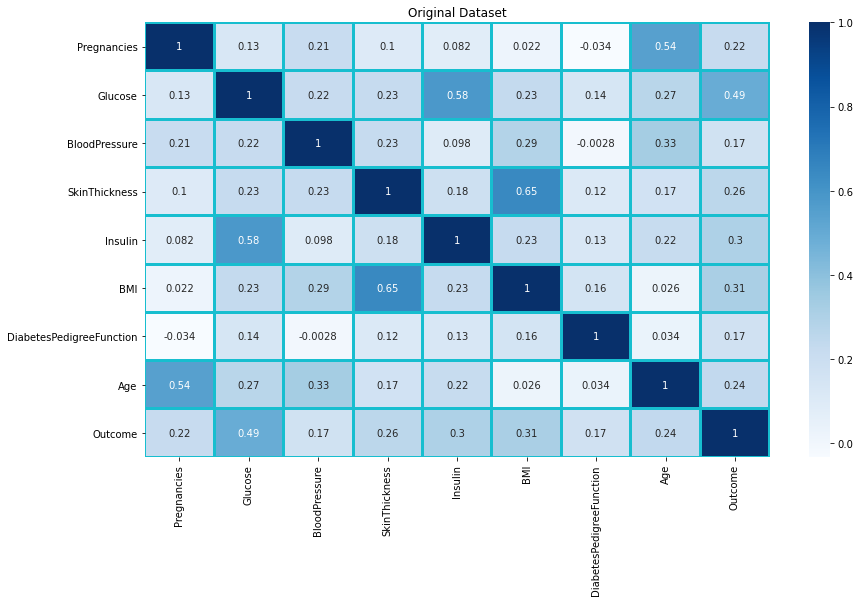

In [9]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linecolor = 'tab:cyan', linewidths = 2)
plt.title("Original Dataset")
plt.show()

### Initial Pair Plot

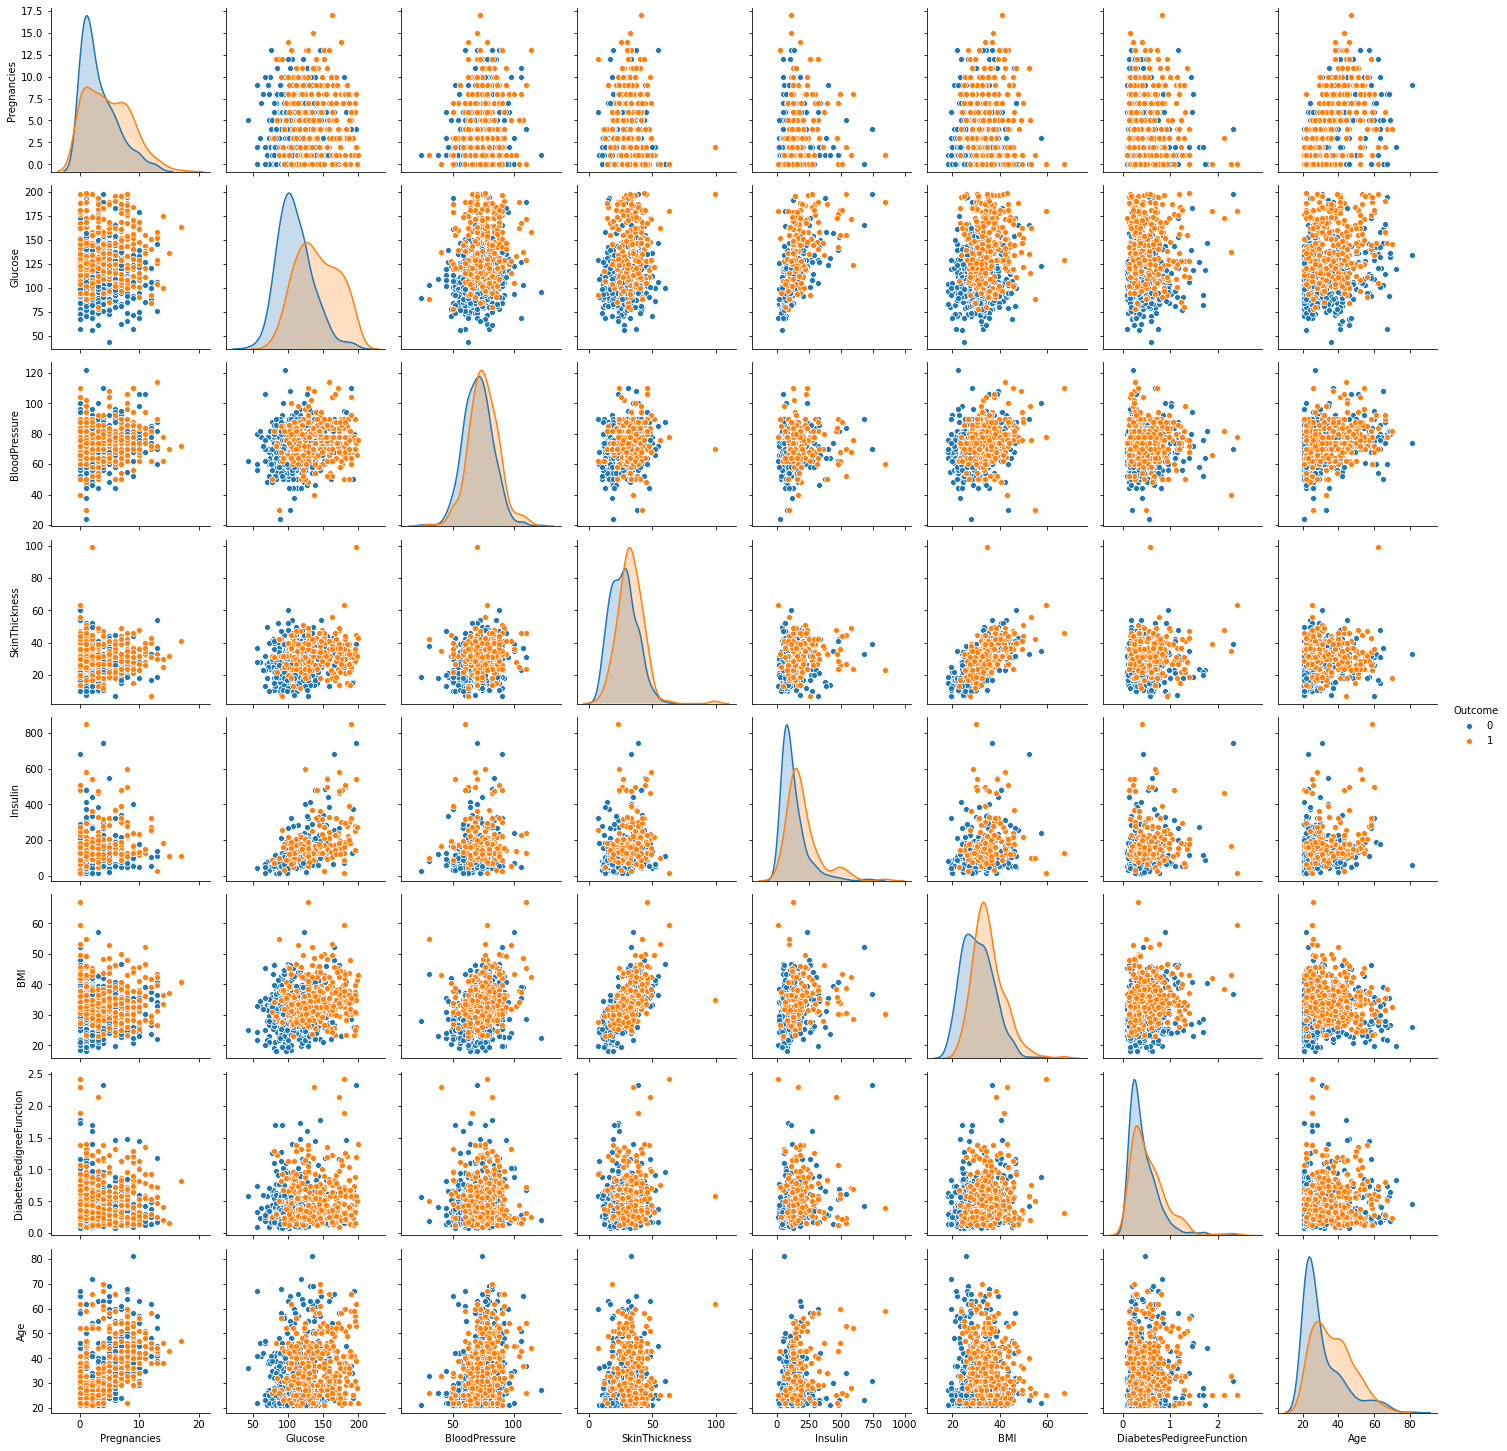

In [10]:
sns.pairplot(data, hue = 'Outcome', diag_kind='kde')
plt.show()

## Filling the Missing Values with respective Medians

In [11]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [12]:
def update_nan(var):
    data.loc[(data['Outcome'] == 0 ) & (data[var].isnull()), var] = float(median_target(var).loc[median_target(var)['Outcome']==0][var])
    data.loc[(data['Outcome'] == 1 ) & (data[var].isnull()), var] = float(median_target(var).loc[median_target(var)['Outcome']==1][var])

In [13]:
update_nan('Insulin')
update_nan('Glucose')
update_nan('BloodPressure')
update_nan('SkinThickness')
update_nan('BMI')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Filled Correlation Map

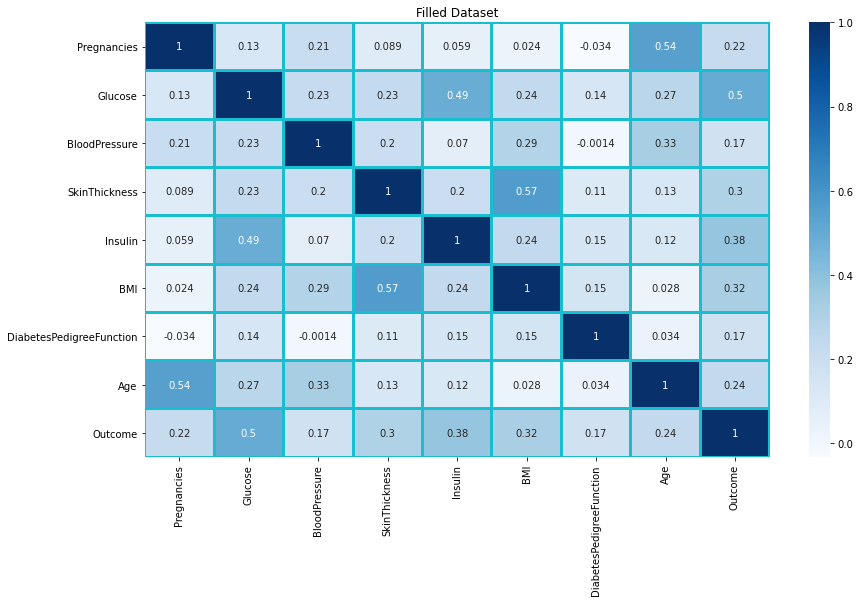

In [15]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linecolor = 'tab:cyan', linewidths = 2)
plt.title("Filled Dataset")
plt.show()

### Filled Pair Plot

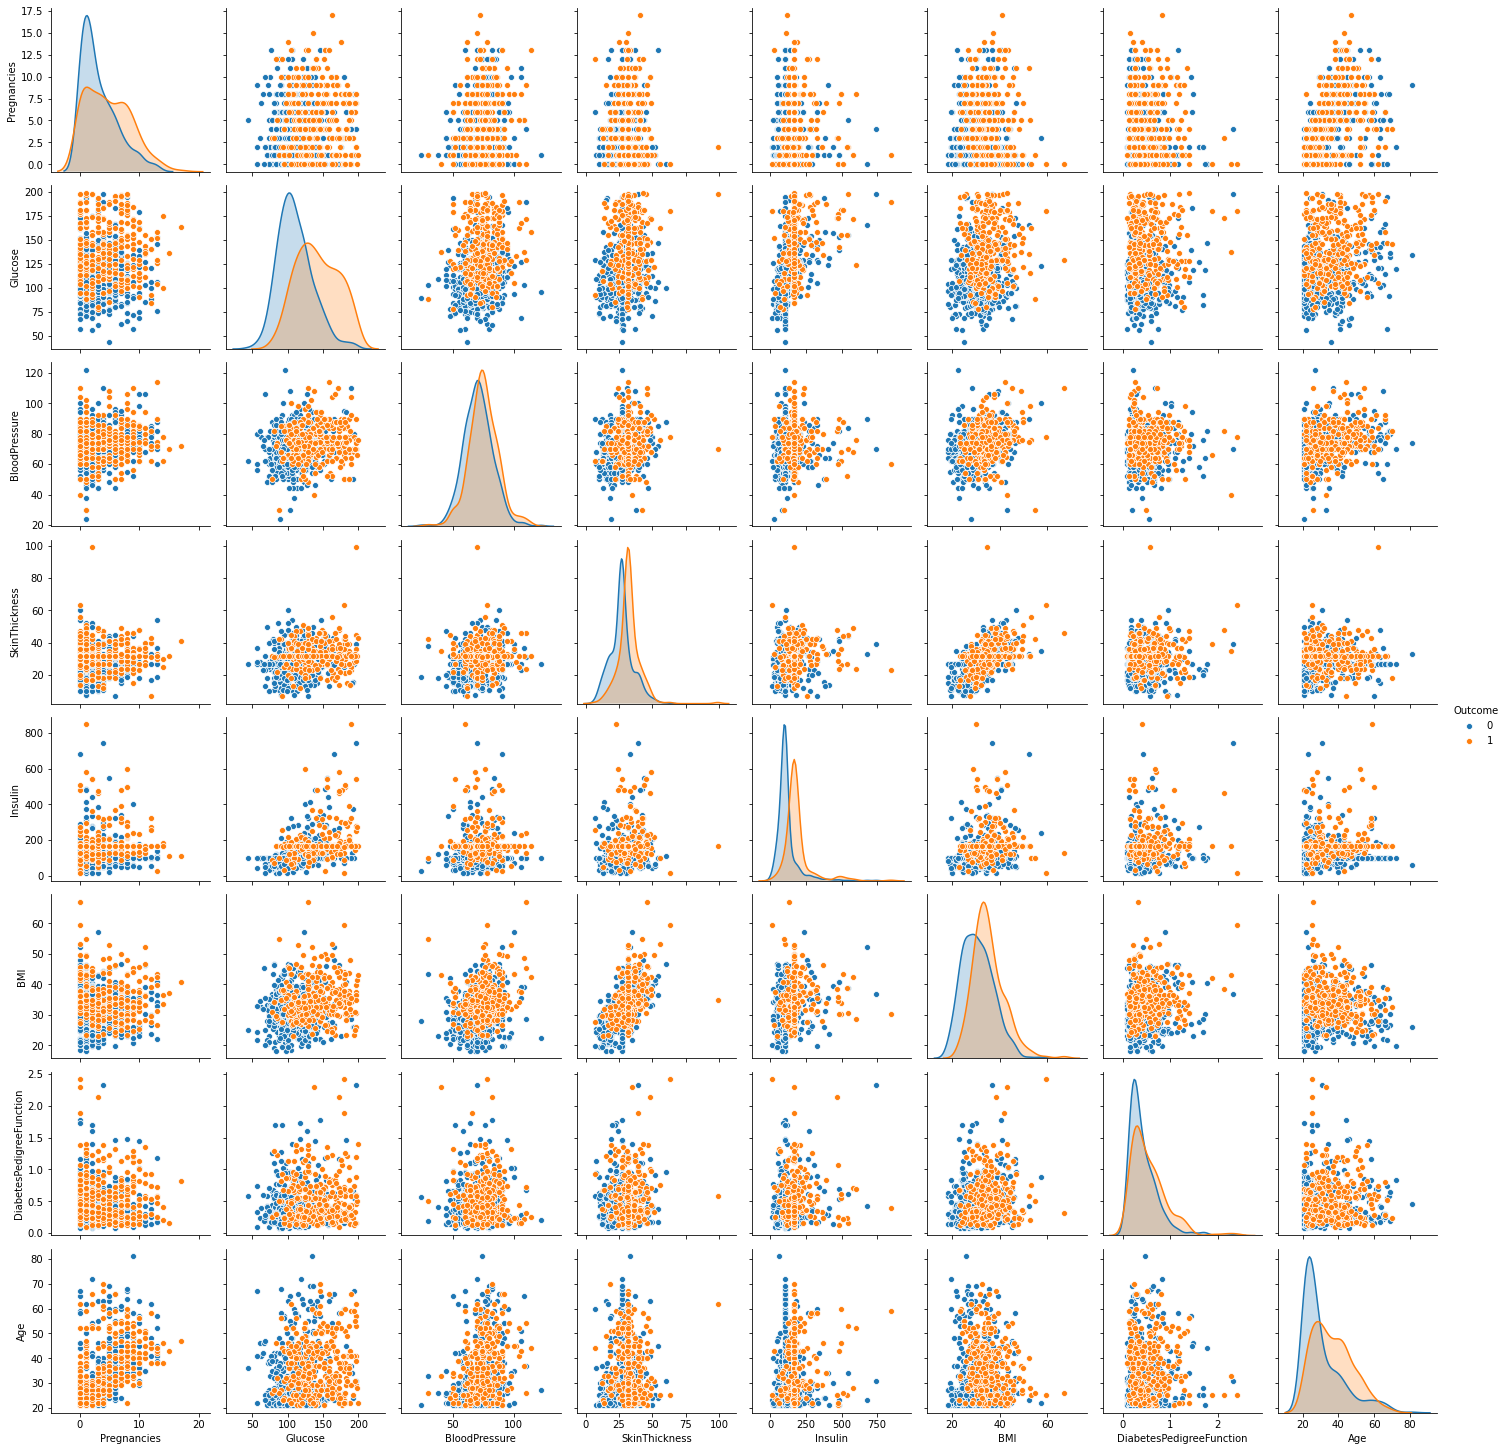

In [16]:
import seaborn as sns
sns.pairplot(data, hue = 'Outcome', diag_kind='kde')
plt.show()

## Adding New Features

In [17]:
# Function to generate a scatter plot of two variables
def plot_fvf(f1, f2) :  
    D = data[(data['Outcome'] != 0)]
    N = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[f1],
        y = D[f2],
        name = 'Diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = N[f1],
        y = N[f2],
        name = 'Non-Diabetic',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = f1 +" "+"vs"+" "+ f2,
                  yaxis = dict(title = f2,zeroline = False),
                  xaxis = dict(title = f1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [18]:
# Function to generate distribution plot of one variable
def plot_distribution(var, size_bin) :  
    D = data[(data['Outcome'] != 0)]
    N = data[(data['Outcome'] == 0)]
    tmp1 = D[var]
    tmp2 = N[var]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Diabetic', 'Non-Diabetic']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = var)

    py.iplot(fig, filename = 'Density plot')

In [19]:
plot_fvf('Glucose','Age')

In [20]:
data.loc[:,'F0']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'F0']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  
0                     0.627   50        1   0  
1                     0.351   31        0   0  
2                     0.672   32        1   0  
3                     0.167   21        0   1  
4                     2.288   33        1   0

According to Wikipedia, people with a BMI of more than 30 are categorized as obese. And obese people are highly prone to being Diabetic.
Hence, we create a new feature for Obesity with a threshold of 30 kg/m^2

In [21]:
data.loc[:,'F1']=0
data.loc[(data['BMI']<=30),'F1']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  
0                     0.627   50        1   0   0  
1                     0.351   31        0   0   1  
2                     0.672   32        1   0   1  
3                     0.167   21        0   1   1  
4                     2.288   33        1   0   0

In [22]:
plot_fvf('Pregnancies','Age')

In [23]:
data.loc[:,'F2']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'F2']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  
0                     0.627   50        1   0   0   0  
1                     0.351   31        0   0   1   0  
2                     0.672   32        1   0   1   0  
3                     0.167   21        0   1   1   1  
4                     2.288   33        1   0   0   0

In [24]:
plot_fvf('Glucose','BloodPressure')

In [25]:
data.loc[:,'F3']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'F3']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  
0                     0.627   50        1   0   0   0   0  
1                     0.351   31        0   0   1   0   1  
2                     0.672   32        1   0   1   0   0  
3                     0.167   21        0   1   1   1   1  
4                     2.288   33        1   0   0   0   0

In [26]:
plot_fvf('SkinThickness','BMI')

In [27]:
data.loc[:,'F4']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'F4']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  
0                     0.627   50        1   0   0   0   0   0  
1                     0.351   31        0   0   1   0   1   0  
2                     0.672   32        1   0   1   0   0   0  
3                     0.167   21        0   1   1   1   1   0  
4                     2.288   33        1   0   0   0   0   0

In [28]:
plot_fvf('Glucose','BMI')

In [29]:
data.loc[:,'F5']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'F5']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  F5  
0                     0.627   50        1   0   0   0   0   0   0  
1                     0.351   31        0   0   1   0   1   0   1  
2                     0.672   32        1   0   1   0   0   0   0  
3                     0.167   21        0   1   1   1   1   0   1  
4                     2.288   33        1   0   0   0   0   0   0

In [30]:
plot_distribution('SkinThickness', 0)

In [31]:
data.loc[:,'F6']=0
data.loc[(data['SkinThickness']<=20) ,'F6']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  F5  F6  
0                     0.627   50        1   0   0   0   0   0   0   0  
1                     0.351   31        0   0   1   0   1   0   1   0  
2                     0.672   32        1   0   1   0   0   0   0   0  
3                     0.167   21        0   1   1   1   1   0   1   0  
4                     2.288   33        1   0   0   0   0   0   0   0

In [32]:
plot_distribution('Insulin', 0)

In [33]:
data.loc[:,'F7']=0
data.loc[(data['Insulin']<200),'F7']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  F5  F6  F7  
0                     0.627   50        1   0   0   0   0   0   0   0   1  
1                     0.351   31        0   0   1   0   1   0   1   0   1  
2                     0.672   32        1   0   1   0   0   0   0   0   1  
3                     0.167   21        0   1   1   1   1   0   1   0   1  
4                     2.288   33        1   0   0   0   0   0   0   0   1

In [34]:
plot_distribution('BloodPressure', 0)

In [35]:
data.loc[:,'F8']=0
data.loc[(data['BloodPressure']<80),'F8']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  F5  F6  F7  F8  
0                     0.627   50        1   0   0   0   0   0   0   0   1   1  
1                     0.351   31        0   0   1   0   1   0   1   0   1   1  
2                     0.672   32        1   0   1   0   0   0   0   0   1   1  
3                     0.167   21        0   1   1   1   1   0   1   0   1   1  
4                     2.288   33        1   0   0   0   0   0   0   0   1   1

In [36]:
plot_distribution('Pregnancies', 0)

In [37]:
data.loc[:,'F9']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'F9']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  F1  F2  F3  F4  F5  F6  F7  F8  \
0                     0.627   50        1   0   0   0   0   0   0   0   1   1   
1                     0.351   31        0   0   1   0   1   0   1   0   1   1   
2                     0.672   32        1   0   1   0   0   0   0   0   1   1   
3                     0.167   21        0   1   1   1   1   0   1   0   1   1   
4                     2.288   33        1   0   0   0   0   0   0   0   1   1   

   F9  
0   0  
1   1  
2   0  
3   1  
4   0

#### Extra features based on intuition

In [38]:
data['F10'] = data['BMI'] * data['SkinThickness']
data['F11'] =  data['Pregnancies'] / data['Age']
data['F12'] = data['Age'] / data['Insulin']
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  ...  F3  F4  F5  F6  F7  F8  \
0                     0.627   50        1   0  ...   0   0   0   0   1   1   
1                     0.351   31        0   0  ...   1   0   1   0   1   1   
2                     0.672   32        1   0  ...   0   0   0   0   1   1   
3                     0.167   21        0   1  ...   1   0   1   0   1   1   
4                     2.288   33        1   0  ...   0   0   0   0   1   1   

   F9     F10       F11       F12  
0   0  1176.0  0.120000  0.294985  
1   1   771.4  0.032258  0.302439  
2   0   745.6  0.250000  0.188791  
3   1   646.3  0.047619  0.223404  
4   0  1508.5  0.000000  0.196429  

[5 rows x 22 columns]

In [39]:
plot_distribution('F10', 0)

In [40]:
data.loc[:,'F13']=0
data.loc[(data['F10']<1034) ,'F13']=1
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  F0  ...  F4  F5  F6  F7  F8  F9  \
0                     0.627   50        1   0  ...   0   0   0   1   1   0   
1                     0.351   31        0   0  ...   0   1   0   1   1   1   
2                     0.672   32        1   0  ...   0   0   0   1   1   0   
3                     0.167   21        0   1  ...   0   1   0   1   1   1   
4                     2.288   33        1   0  ...   0   0   0   1   1   0   

      F10       F11       F12  F13  
0  1176.0  0.120000  0.294985    0  
1   771.4  0.032258  0.302439    1  
2   745.6  0.250000  0.188791    1  
3   646.3  0.047619  0.223404    1  
4  1508.5  0.000000  0.196429    0  

[5 rows x 23 columns]

### Final Correlation Map

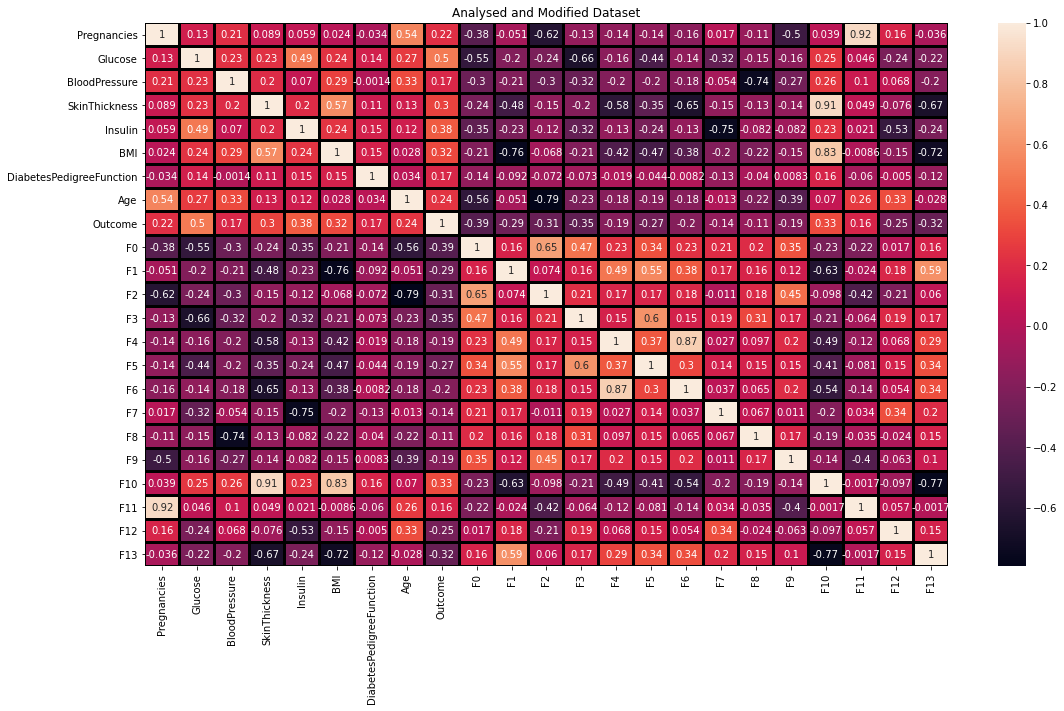

In [41]:
plt.figure(figsize = (18, 10))
sns.heatmap(data.corr(), annot = True, linecolor = 'black', linewidths = 2)
plt.title("Analysed and Modified Dataset")
plt.show()

### Feature wise Histogram Plots

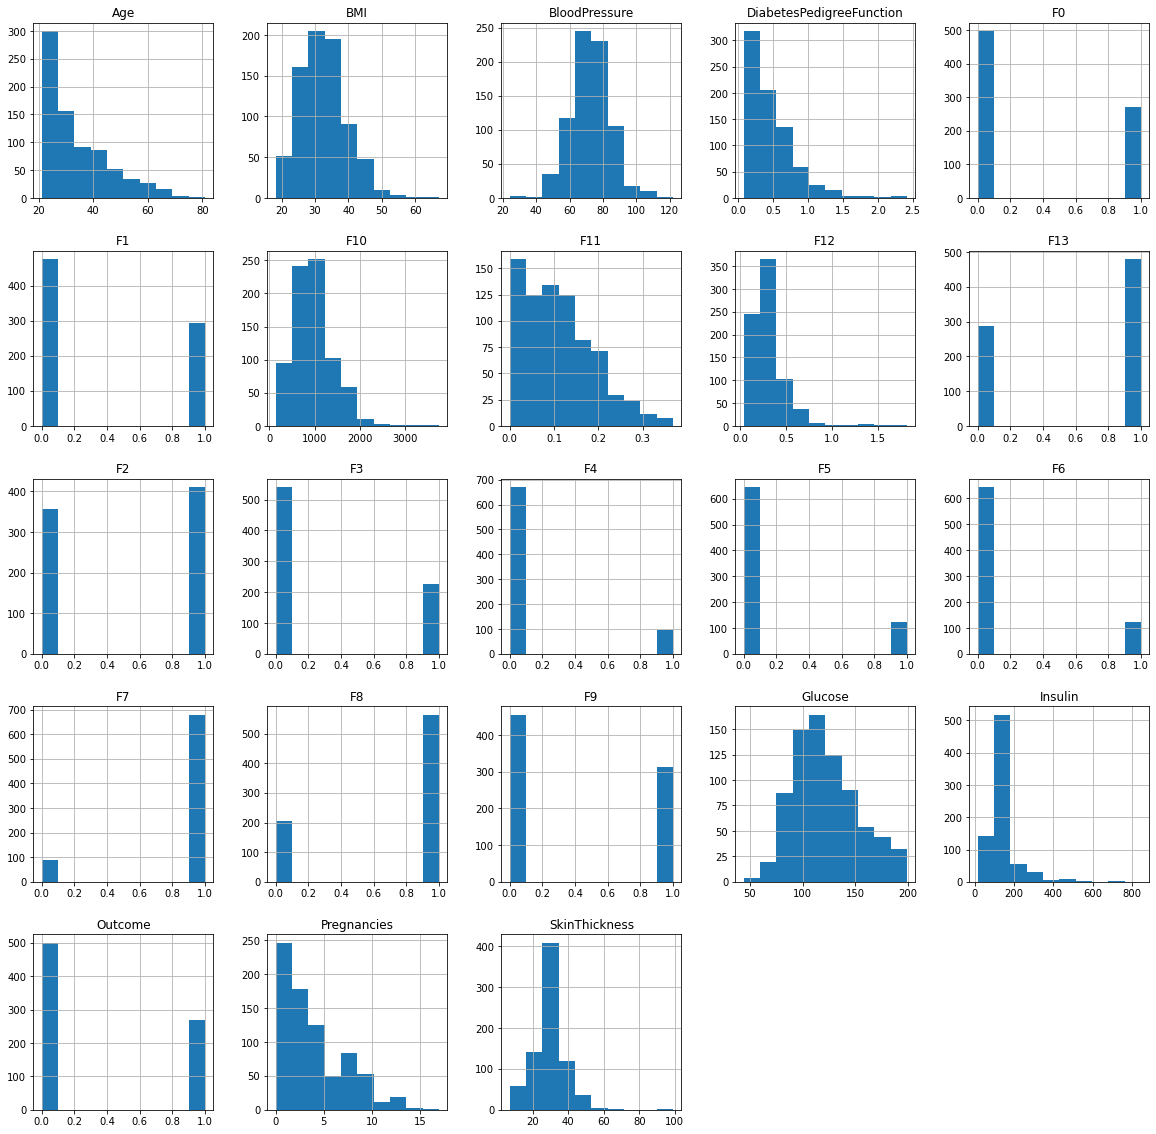

In [42]:
plot = data.hist(figsize=(20,20))

Now we have a dataset with no missing values that were appropriately filled a new feature columns that will help with classification.

## Saving the dataset

In [43]:
data.to_csv('../data/diabetes-FINAL.csv')

In [44]:
data.describe().transpose()

count        mean         std         min  \
Pregnancies               768.0    3.845052    3.369578    0.000000   
Glucose                   768.0  121.677083   30.464161   44.000000   
BloodPressure             768.0   72.389323   12.106039   24.000000   
SkinThickness             768.0   29.089844    8.890820    7.000000   
Insulin                   768.0  141.753906   89.100847   14.000000   
BMI                       768.0   32.434635    6.880498   18.200000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329    0.078000   
Age                       768.0   33.240885   11.760232   21.000000   
Outcome                   768.0    0.348958    0.476951    0.000000   
F0                        768.0    0.351562    0.477769    0.000000   
F1                        768.0    0.380208    0.485754    0.000000   
F2                        768.0    0.535156    0.499088    0.000000   
F3                        768.0    0.295573    0.456597    0.000000   
F4                        768.0    0.126302    0.332406    0.000000   
F5                        768.0    0.158854    0.365778    0.000000   
F6                        768.0    0.161458    0.368193    0.000000   
F7                        768.0    0.884115    0.320296    0.000000   
F8                        768.0    0.733073    0.442642    0.000000   
F9                        768.0    0.407552    0.491699    0.000000   
F10                       768.0  978.102734  453.893312  137.200000   
F11                       768.0    0.108210    0.081790    0.000000   
F12                       768.0    0.299661    0.195716    0.033824   
F13                       768.0    0.625000    0.484438    0.000000   

                                 25%         50%          75%          max  
Pregnancies                 1.000000    3.000000     6.000000    17.000000  
Glucose                    99.750000  117.000000   140.250000   199.000000  
BloodPressure              64.000000   72.000000    80.000000   122.000000  
SkinThickness              25.000000   28.000000    32.000000    99.000000  
Insulin                   102.500000  102.500000   169.500000   846.000000  
BMI                        27.500000   32.050000    36.600000    67.100000  
DiabetesPedigreeFunction    0.243750    0.372500     0.626250     2.420000  
Age                        24.000000   29.000000    41.000000    81.000000  
Outcome                     0.000000    0.000000     1.000000     1.000000  
F0                          0.000000    0.000000     1.000000     1.000000  
F1                          0.000000    0.000000     1.000000     1.000000  
F2                          0.000000    1.000000     1.000000     1.000000  
F3                          0.000000    0.000000     1.000000     1.000000  
F4                          0.000000    0.000000     0.000000     1.000000  
F5                          0.000000    0.000000     0.000000     1.000000  
F6                          0.000000    0.000000     0.000000     1.000000  
F7                          1.000000    1.000000     1.000000     1.000000  
F8                          0.000000    1.000000     1.000000     1.000000  
F9                          0.000000    0.000000     1.000000     1.000000  
F10                       664.575000  923.700000  1202.725000  3742.200000  
F11                         0.041667    0.095238     0.166667     0.368421  
F12                         0.193682    0.253687     0.360976     1.818182  
F13                         0.000000    1.000000     1.000000     1.000000